# Selección de casos de análisis

El conjunto de entrenamiento está formado por 9,446 imagenes adquiridas de 44 pacientes. El archivo TrainingSet_20aimVO.csv contiene el nombre de cada una de las imagenes y la clase a la que pertenece.

Las clases contempladas son 4: 
- Squamous epithelium (tejido saludable)
- Intestinal Metaplasia (tejido del esofajo que se ha transformado en tejido intestinal)
- Gastric Metaplasia (tejido gastrico cercano a la unión con el esófago)
- Displasya/Cancer (celulas pre-cancerosas/Cáncer)

Para nuestro clasificador binomial utilizaremos solamente las imagenes de tejido sano y de células pre-cancerígenas o cancerígenas.

El presente Notebook crea un subconjunto de imágenes reducidas a la mitad del tamaño, con los casos que usaremos en el clasificador con Perceptrón.

In [1]:
# Librerias
import warnings
warnings.filterwarnings(action='ignore')
import os
import random
import numpy as np
import pandas as pd
from skimage.transform import rescale
from skimage import io
import matplotlib.pyplot as plt
from matplotlib import image

%matplotlib inline

In [2]:
pathDatos = os.path.join(os.path.pardir,'datos')

In [3]:
pathDatos

'..\\datos'

In [4]:
traindf = pd.read_csv(os.path.join(pathDatos,'TrainingSet_20aimVO.csv'))

In [5]:
traindf.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [6]:
traindf.class_number.value_counts()

class_number
3    3594
1    3177
0    1469
2    1206
Name: count, dtype: int64

In [7]:
traindf.shape

(9446, 2)

## Seleccionamos las imagenes de tejido sano y tejido con cancer

In [8]:
df = traindf[(traindf.class_number == 0) |(traindf.class_number == 3 )]

In [9]:
df = df.replace(3,1)
df.shape

(5063, 2)

In [10]:
df.class_number.value_counts()

class_number
1    3594
0    1469
Name: count, dtype: int64

In [11]:
df.to_csv(os.path.join(pathDatos,'ClasesImagenes.csv'), index=False)

In [14]:
help(df.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf: 'FilePath | WriteBuffer[bytes] | WriteBuffer[str] | None' = None, *, sep: 'str' = ',', na_rep: 'str' = '', float_format: 'str | Callable | None' = None, columns: 'Sequence[Hashable] | None' = None, header: 'bool_t | list[str]' = True, index: 'bool_t' = True, index_label: 'IndexLabel | None' = None, mode: 'str' = 'w', encoding: 'str | None' = None, compression: 'CompressionOptions' = 'infer', quoting: 'int | None' = None, quotechar: 'str' = '"', lineterminator: 'str | None' = None, chunksize: 'int | None' = None, date_format: 'str | None' = None, doublequote: 'bool_t' = True, escapechar: 'str | None' = None, decimal: 'str' = '.', errors: 'OpenFileErrors' = 'strict', storage_options: 'StorageOptions | None' = None) -> 'str | None' method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    Parameters
    ----------
    path_or_buf : str, path object, file-like ob

## Exploramos el formato de las imagenes mediante un ejemplo

Cuando cargamos una imagen a color, el objeto resultante es una matriz de tres dimensiones, que representa de manera eficiente el nivel de cada pixel entre 0 y 255 (256 niveles discretos de color son suficientes para la percepción del ojo humano)

In [15]:
datos = df

In [16]:
pathImages = os.path.join(os.path.pardir,'datos','TrainingSetImagesDir')

In [18]:
def cuadrado(x):
    return x**2

lambda x: x**2

<function __main__.<lambda>(x)>

In [19]:
# Filtramos las imágenes de las clases 0 y 3, tejido sano y cancerígenas
datos['image_filename'] = df['image_filename'].apply(lambda row: [os.path.join(pathImages, row)])

In [20]:
datos.head()

,image_filename,class_number
0,[..\datos\TrainingSetImagesDir\im_4_0.png],0
1,[..\datos\TrainingSetImagesDir\im_21_0.png],0
2,[..\datos\TrainingSetImagesDir\im_9_0.png],0
3,[..\datos\TrainingSetImagesDir\im_8_0.png],0
4,[..\datos\TrainingSetImagesDir\im_15_0.png],0


In [21]:
datos['image_filename'] = df['image_filename'].str.get(0)

In [22]:
datos.head()

,image_filename,class_number
0,..\datos\TrainingSetImagesDir\im_4_0.png,0
1,..\datos\TrainingSetImagesDir\im_21_0.png,0
2,..\datos\TrainingSetImagesDir\im_9_0.png,0
3,..\datos\TrainingSetImagesDir\im_8_0.png,0
4,..\datos\TrainingSetImagesDir\im_15_0.png,0


In [23]:
datos['image_filename'][0]

'..\\datos\\TrainingSetImagesDir\\im_4_0.png'

In [28]:
imag1 = io.imread(datos['image_filename'][7])

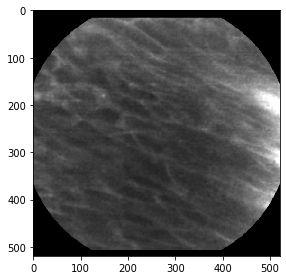

In [29]:
io.imshow(imag1)
plt.show()

In [30]:
imag1.shape

(519, 521, 3)

[How to Convert a Picture to Numbers». Accedido 12 de mayo de 2020.](https://e2eml.school/images_to_numbers.html).
- Dimensión 0: 519 renglones de pixeles de arriba a abajo
- Dimension 1: 521 columnas de pixeles de izquierda a derecha
- Dimension 2: 3 Canales de color (rojo, verde y azul en ese orden) (RGB)

## Cargamos todas las imágenes de tejido sano y tejido con cáncer

In [31]:
img= [io.imread(i, as_gray=True) for i in datos['image_filename'][:]]

In [32]:
len(img)

5063

In [ ]:
img_scl = []
for i in range (len(img)):
    scl = rescale(img[i] , 1/2)
    img_scl.append(scl)

In [ ]:
for i in range(len(img)):
    image.imsave(os.path.join(pathDatos,'CarpetaImagenes', datos.image_filename[i]), img_scl[i])